<a href="https://colab.research.google.com/github/dartwinshu/dibimbing-python-for-data-analysis/blob/main/Dibimbing%20-%20Python%20for%20Data%20Analysis%20-%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
apartment = pd.read_csv('apartdata.csv')

In [ ]:
apartment

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


### Questions

1. Terdapat beberapa baris dalam data harga apartment yang memiliki currency USD (bukan IDR). Tolong buatlah sebuah kolom baru bernama `CleanedPrice` yang berisi `Annual_Price` yang telah dibersihkan dengan ketentuan berikut:
- Jika currency adalah IDR, maka biarkan
- Jika currency adalah USD, maka kalikan dengan 15 000 (asumsi 1 USD = 15 000 IDR)

2. Perhatikanlah kolom `No_Rooms` dan `CleanedPrice`. Apakah apartment yang lebih banyak ruangan memiliki harga yang lebih tinggi? Apakah ada yang aneh di antara kedua kolom tersebut? Jika Anda menemukan sesuatu yang aneh, coba deskripsikan dan coba jelaskan, kenapa 'hal tersebut' aneh. Soal ini akan menguji skill Data Exploration peserta didik. 

3. Perhatikan kolom `Area` dan `CleanedPrice`. Seperti pada hands-on, buanglah semua baris yang memiliki Area > 1000. Apakah setelah proses pembuangan tersebut, maka kedua kolom ini sudah tidak memiliki hal yang aneh? Jika menurut Anda ada hal yang aneh, coba jelaskan, apa yang aneh dan 'tidak masuk akal'. Jika tidak ada yang aneh, maka tulislah "tidak ada kejanggalan yang ditemukan". 

4. Berapa korelasi dari `No_Rooms` dan `Bathroom`? Setelah menghitung korelasi antara keduanya, apa yang dapat kalian simpulkan? 

### Answer:

#### Nomor 1

In [ ]:
#Mengetahui jenis dan jumlah data
apartment.info()
#Melihat contoh sampel data secara acak
apartment.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
4828,Signature Park Grande 2BR Tower green,2,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,49.0,Tower The Green,20,IDR,70000000
3077,Taman Rasuna Apartment 3BR Fully Furnished,3,2,Kuningan,Jakarta Selatan,106.836760,-6.218768,1,91.0,Tower 9,24,IDR,126000000
1667,Nagoya Mansion Apartment Studio Tower B,0,1,Lubuk Baja,Batam,104.014900,1.143400,1,28.0,Tower B,12,IDR,72000000
4863,Gardenia Boulevard Apartment 1BR Fully Furnished,1,1,Pejaten,Jakarta Selatan,106.827411,-6.284048,1,37.0,Tower A,22,IDR,82400000
2680,Mediterania Garden Residence 2 2BR Fully Furni...,2,1,Tanjung Duren,Jakarta Barat,106.788166,-6.175894,1,42.0,Tower F,23,IDR,55650000
3192,Green Pramuka City Apartment Studio Fully Furn...,0,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,21.0,Tower Orchid,20,IDR,41850000
3571,Ciputra World 2 Apartment 2BR View city,2,2,Kuningan,Jakarta Selatan,106.820139,-6.221259,1,85.0,Tower Orchard,22,IDR,280000000
5112,Northland Ancol Residence 2BR Non Furnished,2,1,Ancol,Jakarta Utara,106.839363,-6.129877,0,41.0,Tower 1,14,IDR,55000000
564,Thamrin Residence Apartment 2BR Fully Furnished,2,1,Thamrin,Jakarta Pusat,106.816842,-6.197352,1,65.0,Tower D,24,IDR,132000000
2717,Taman Sari Semanggi Apartment 1BR Fully Furnished,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,45.0,Tower A,23,IDR,96000000


In [ ]:
#Meng-copy data untuk menghindari edit pada data primer langsung
df_update = apartment.copy()

In [ ]:
#Membuat kolom baru CleanedPrice
CleanedPrice = []

#Melakukan looping dan if-else untuk mengecek data Currency
##Jika Currency = USD, maka CleanedPrice = AnnualPrice * 15000
##Jika Currency != USD, maka CleanedPrice = AnnualPrice
for Currency, Annual_Price in zip(df_update['Currency'], df_update['Annual_Price']):
    if Currency == 'USD':
        CleanedPrice.append(Annual_Price * 15000)
    else:
        CleanedPrice.append(Annual_Price)

#Menambahkan kolom CleanedPrice ke dalam data df_update
df_update['CleanedPrice'] = CleanedPrice

#Menampilkan data untuk mengecek hasil
df_update[df_update['Currency'] == 'USD']

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
76,1 Park Residences 2BR Fully Furnished,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,91.0,Tower A,24,USD,19800,297000000
358,Kemang Village Apartment 3BR View City,3,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,168.0,Tower Ritz,22,USD,28800,432000000
443,Kemang Village Apartment 2BR Fully Furnished,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,130.0,Tower Intercone,21,USD,20400,306000000
453,1 Park Residences 2BR View City,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,94.0,Tower B,24,USD,21600,324000000
462,BEST DEAL & still negotiable !!! SETIABUDI SKY...,3,2,Setiabudi,Jakarta Selatan,106.828806,-6.215463,1,135.0,Tower 1,18,USD,27600,414000000
770,Residences 8 Senopati 1BR,1,1,Senopati,Jakarta Selatan,106.806005,-6.228974,1,94.0,Tower 3,14,USD,19200,288000000
781,District 8 Senopati 2BR FULLY FURNISHED,2,2,Senopati,Jakarta Selatan,106.806680,-6.228444,1,105.0,Tower Infinity,18,USD,28800,432000000
1033,District 8 Senopati 3BR,3,3,Senopati,Jakarta Selatan,106.806680,-6.228444,1,179.0,Tower Infinity,18,USD,42000,630000000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400,666000000
1149,Pakubuwono Residence 3BR Tower Sandalwood,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,0,303.0,Tower Sandalwood,22,USD,54000,810000000


In [ ]:
#Memasukan data yang telah diperbarui ke data utama
apartment = df_update

#### Nomor 2

In [ ]:
#Menampilkan data
apartment

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000


In [ ]:
#Sebelum menganalisis hubungan antara No_Rooms dan CleanedPrice, dilakukan terlebih dahulu pengecekan kualitas data
#Terutama pada data No_Rooms dan CleanedPrice
#Menggunakan metode info() dan describe()
apartment.info()
apartment.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,Annual_Price
count,5303.000000,5303.000000,5303.000000,5303.000000,5303.000000,5303.000000,5303.000000,5.303000e+03
mean,1.517632,1.251367,106.836413,-6.196851,0.838959,61.080454,19.405619,9.982642e+07
std,0.963900,0.525101,0.372240,0.475304,0.367603,158.657168,3.880148,9.618815e+07
min,0.000000,0.000000,104.014900,-7.949100,0.000000,0.000000,0.000000,1.392000e+04
25%,1.000000,1.000000,106.784377,-6.237284,1.000000,33.000000,18.000000,4.200000e+07
50%,2.000000,1.000000,106.816842,-6.197352,1.000000,42.000000,20.000000,6.400000e+07
75%,2.000000,1.000000,106.851836,-6.175894,1.000000,73.000000,22.000000,1.200000e+08
max,6.000000,5.000000,119.441818,6.304300,1.000000,7781.000000,24.000000,1.296000e+09


### Dari hasil diatas, dapat diketahui:

A. No_Rooms
1. Data No_Rooms lengkap non-null sebanyak 5303 data
2. Jumlah kamar paling sedikit = 0 (tipe kamar studio) dan paling banyak = 6
3. Rata-rata jumlah kamar dari data apartment adalah 1,5 kamar (1 atau 2 kamar)
4. Nilai tengah jumlah kamar dari data apartment adalah 2 kamar

B. CleanedPrice
1. Data CleanedPrice lengkap non-null sebanyak 5303 data
2. Harga apartemen paling murah 12 juta rupiah per tahun  dan paling mahal 810 miliar rupiah per tahun
3. Rata-rata harga apartemen dari data apartment adalah sekitar 256 juta per tahun
4. Nilai tengah dari harga apartemen dari data apartment adalah 65 juta per tahun

In [ ]:
#Karena data No_Rooms dan CleanedPrice keduanya merupakan data numerical,
#Maka dapat dilakukan perhitungan nilai korelasi Pearson untuk mengetahui apakah kedua data memiliki hubungan atau tidak
#Menentukan nilai korelasi Pearson
np.corrcoef(apartment['No_Rooms'], apartment['CleanedPrice'])

array([[ 1.        , -0.01750289],
       [-0.01750289,  1.        ]])

<AxesSubplot:xlabel='No_Rooms', ylabel='CleanedPrice'>

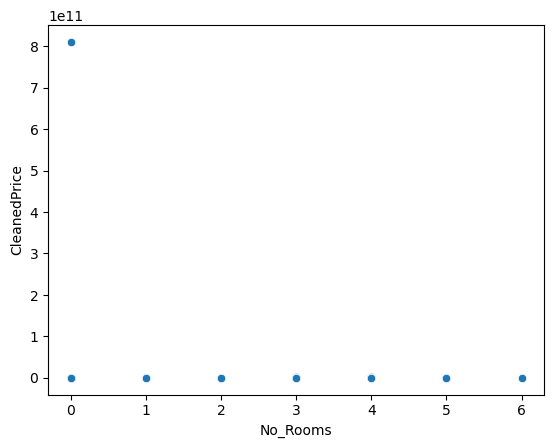

In [ ]:
#Menampilkan scatter plot antara No_Rooms dan CleanedPrice
sns.scatterplot(data = apartment, x = 'No_Rooms', y = 'CleanedPrice')

### Dari hasil diatas, dapat diketahui:

A. Nilai Korelasi Pearson

Nilai korelasi Pearson menunjukkan nilai sebesar -0.01750289, artinya jika berdasarkan data apartment yang ada, maka hubungan antara No_Rooms dan CleanedPrice bisa dianggap tidak ada. Karena nilai absolut dari nilai korelasi Pearson yang diperoleh sangat kecil dari 1

B. Scatter Plot No_Rooms vs Cleaned Price
1. Scatter Plot memiliki sumbu X berupa No_Rooms memiliki rentang dari 0 sampai 6 kamar
2. Scatter Plot memiliki sumbu y berupa CleanedPrice memiliki rentang dari 12 juta rupiah per tahun sampai 810 miliar rupiah per tahun
3. Terdapat titik yang dicurigai sebagai outlier pada pojok sebelah kiri atas karena nilai No_Rooms yang kecil dan CleanedPrice yang tinggi

### Keanehan data yang dapat disimpulkan:
1. Pada data No_Rooms diketahui memiliki nilai min. 0 kamar dan nilai maks 6 kamar, tetapi memiliki nilai tengah 2 kamar dan nilai rata-rata 1,5 kamar yang berbeda sedikit signifikan dari rata-rata antara nilai maks.-min. tsb
2. Pada data CleanedPrice diketahui memiliki rata-rata 256 juta rupiah per tahun, tetapi memiliki nilai tengah yang berbeda signifikan pada 65 juta rupiah per tahun
3. Pada data CleanedPrice diketahui memiliki nilai min. 12 juta rupiah per tahun dan nilai maks. 810 miliar rupiah per tahun, tetapi memiliki nilai tengah pada 65 juta rupiah per tahun dan nilai rata-rata 256 juta per tahun yang berbeda signifikan dari rata-rata antara nilai maks.-min. tsb
4. Nilai korelasi Pearson antara No_Rooms dan CleanedPrice menunjukan hubungan antara jumlah kamar dan harga apartemen tidak ada. Padahal jumlah kamar dan harga apartemen memiliki hubungan yang kuat adalah pengetahuan umum/fakta
5. Pada Scatter Plot antara No_Rooms dan CleanedPrice menunjukkan adanya data yang dapat dicurigai sebagai outlier pada pojok kiri atas, karena memiliki nilai No_Rooms yang kecil, tetapi nilai CleanedPrice yang tinggi

### Saya menemukan kejanggalan: Iya

#### Nomor 3

In [ ]:
#Menghapus data apartment yang memiliki data area > 1000 satuan luas berdasarkan kesepakatan bersama pada soal
apartment = apartment[apartment['Area']<1000]

In [ ]:
#Sebelum menganalisis hubungan antara Area dan CleanedPrice, dilakukan terlebih dahulu pengecekan kualitas data
#Terutama pada data Area dan CleanedPrice
#Menggunakan metode info() dan describe()
apartment.info()
apartment.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5299 entries, 0 to 5302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5298 non-null   object 
 1   No_Rooms          5299 non-null   int64  
 2   Bathroom          5299 non-null   int64  
 3   Locality          5299 non-null   object 
 4   Region            5299 non-null   object 
 5   Longitude         5299 non-null   float64
 6   Latitude          5299 non-null   float64
 7   Furnished         5299 non-null   int64  
 8   Area              5299 non-null   float64
 9   Tower             5299 non-null   object 
 10  Total_Facilities  5299 non-null   int64  
 11  Currency          5299 non-null   object 
 12  Annual_Price      5299 non-null   int64  
 13  CleanedPrice      5299 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 621.0+ KB


,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,Annual_Price,CleanedPrice
count,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,5.299000e+03,5.299000e+03
mean,1.516890,1.250991,106.836474,-6.196810,0.839026,57.594952,19.410266,9.972439e+07,2.567344e+08
std,0.963787,0.524626,0.372373,0.475480,0.367541,41.739533,3.875373,9.603002e+07,1.112631e+10
min,0.000000,0.000000,104.014900,-7.949100,0.000000,0.000000,0.000000,1.392000e+04,1.200000e+07
25%,1.000000,1.000000,106.784532,-6.237095,1.000000,33.000000,18.000000,4.200000e+07,4.200000e+07
50%,2.000000,1.000000,106.816842,-6.197352,1.000000,42.000000,20.000000,6.355000e+07,6.500000e+07
75%,2.000000,1.000000,106.851836,-6.175894,1.000000,73.000000,22.000000,1.200000e+08,1.260000e+08
max,6.000000,5.000000,119.441818,6.304300,1.000000,644.000000,24.000000,1.296000e+09,8.100000e+11


### Dari hasil diatas, dapat diketahui:

A. Area
1. Data Area lengkap non-null sebanyak 5299 data
2. Area paling sedikit = 0 dan paling banyak = 644 satuan luas
3. Rata-rata area dari data apartment adalah 57,59 satuan luas
4. Nilai tengah area dari data apartment adalah 42 satuan luas

B. CleanedPrice
1. Data CleanedPrice lengkap non-null sebanyak 5299 data
2. Harga apartemen paling murah 12 juta rupiah per tahun  dan paling mahal 810 miliar rupiah per tahun
3. Rata-rata harga apartemen dari data apartment adalah sekitar 256 juta per tahun
4. Nilai tengah dari harga apartemen dari data apartment adalah 65 juta per tahun

In [ ]:
#Karena data Area dan CleanedPrice keduanya merupakan data numerical,
#Maka dapat dilakukan perhitungan nilai korelasi Pearson untuk mengetahui apakah kedua data memiliki hubungan atau tidak
#Menentukan nilai korelasi Pearson
np.corrcoef(apartment['Area'], apartment['CleanedPrice'])

array([[ 1.        , -0.00290526],
       [-0.00290526,  1.        ]])

<AxesSubplot:xlabel='Area', ylabel='CleanedPrice'>

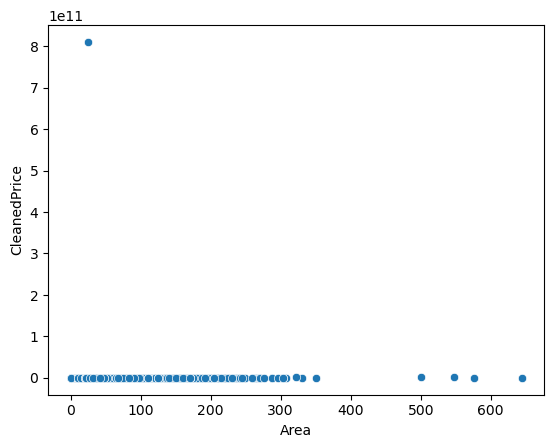

In [ ]:
#Menampilkan scatter plot antara Area dan CleanedPrice
sns.scatterplot(data = apartment, x = 'Area', y = 'CleanedPrice')

### Dari hasil diatas, dapat diketahui:

A. Nilai Korelasi Pearson

Nilai korelasi Pearson menunjukkan nilai sebesar -0.00290526, artinya jika berdasarkan data apartment yang ada, maka hubungan antara Area dan CleanedPrice bisa dianggap tidak ada. Karena nilai absolut dari nilai korelasi Pearson yang diperoleh sangat kecil dari 1

B. Scatter Plot Area vs Cleaned Price
1. Scatter Plot memiliki sumbu X berupa Area memiliki rentang dari 0 sampai 644 satuan luas
2. Scatter Plot memiliki sumbu y berupa CleanedPrice memiliki rentang dari 12 juta rupiah per tahun sampai 810 miliar per tahun
3. Terdapat titik yang dicurigai sebagai outlier pada pojok sebelah kiri atas karena nilai Area yang kecil dan CleanedPrice yang tinggi

### Keanehan data yang dapat disimpulkan:
1. Pada data Area diketahui memiliki nilai min. 0. Padahal suatu unit apartemen pasti memiliki luas tertentu sehingga dapat dihuni
2. Pada data Area diketahui memiliki nilai min. 0 dan nilai maks 644 satuan, tetapi memiliki nilai tengah 42 satuan luas dan nilai rata-rata 57,59 satuan luas yang berbeda signifikan dari rata-rata antara nilai maks.-min. tsb
2. Pada data CleanedPrice diketahui memiliki rata-rata 256 juta rupiah per tahun, tetapi memiliki nilai tengah yang berbeda signifikan pada 65 juta rupiah per tahun
3. Pada data CleanedPrice diketahui memiliki nilai min. 12 juta rupiah per tahun dan nilai maks. 810 miliar rupiah per tahun, tetapi memiliki nilai tengah pada 65 juta rupiah per tahun dan nilai rata-rata 256 juta per tahun yang berbeda signifikan dari rata-rata antara nilai maks.-min. tsb
4. Nilai korelasi Pearson antara Area dan CleanedPrice menunjukan hubungan antara area dan harga apartemen tidak ada. Padahal luas dan harga apartemen memiliki hubungan yang kuat adalah pengetahuan umum/fakta
5. Pada Scatter Plot antara Area dan CleanedPrice menunjukkan adanya data yang dapat dicurigai sebagai outlier pada pojok kiri atas, karena memiliki nilai Area yang kecil, tetapi nilai CleanedPrice yang tinggi

### Saya menemukan kejanggalan: Iya

#### Nomor 4

In [ ]:
#Karena tidak ada instruksi dari soal
#maka data apartment yang digunakan merupakan data apartment yang sudah dihapus sebagian data dari soal No. 3

In [ ]:
#Sebelum menganalisis hubungan antara No_Rooms dan Bathroom, dilakukan terlebih dahulu pengecekan kualitas data
#Terutama pada data No_Rooms dan Bathroom
#Menggunakan metode info() dan describe()
apartment.info()
apartment.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5299 entries, 0 to 5302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5298 non-null   object 
 1   No_Rooms          5299 non-null   int64  
 2   Bathroom          5299 non-null   int64  
 3   Locality          5299 non-null   object 
 4   Region            5299 non-null   object 
 5   Longitude         5299 non-null   float64
 6   Latitude          5299 non-null   float64
 7   Furnished         5299 non-null   int64  
 8   Area              5299 non-null   float64
 9   Tower             5299 non-null   object 
 10  Total_Facilities  5299 non-null   int64  
 11  Currency          5299 non-null   object 
 12  Annual_Price      5299 non-null   int64  
 13  CleanedPrice      5299 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 621.0+ KB


,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,Annual_Price,CleanedPrice
count,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,5299.000000,5.299000e+03,5.299000e+03
mean,1.516890,1.250991,106.836474,-6.196810,0.839026,57.594952,19.410266,9.972439e+07,2.567344e+08
std,0.963787,0.524626,0.372373,0.475480,0.367541,41.739533,3.875373,9.603002e+07,1.112631e+10
min,0.000000,0.000000,104.014900,-7.949100,0.000000,0.000000,0.000000,1.392000e+04,1.200000e+07
25%,1.000000,1.000000,106.784532,-6.237095,1.000000,33.000000,18.000000,4.200000e+07,4.200000e+07
50%,2.000000,1.000000,106.816842,-6.197352,1.000000,42.000000,20.000000,6.355000e+07,6.500000e+07
75%,2.000000,1.000000,106.851836,-6.175894,1.000000,73.000000,22.000000,1.200000e+08,1.260000e+08
max,6.000000,5.000000,119.441818,6.304300,1.000000,644.000000,24.000000,1.296000e+09,8.100000e+11


### Dari hasil diatas, dapat diketahui:

A. No_Rooms
1. Data No_Rooms lengkap non-null sebanyak 5299 data
2. Jumlah kamar paling sedikit = 0 (tipe kamar studio) dan paling banyak = 6
3. Rata-rata jumlah kamar dari data apartment adalah 1,5 kamar (1 atau 2 kamar)
4. Nilai tengah jumlah kamar dari data apartment adalah 2 kamar

B. Bathroom
1. Data CleanedPrice lengkap non-null sebanyak 5299 data
2. Jumlah kamar mandi paling sedikit 0 dan paling banyak 5 buah
3. Rata-rata jumlah kamar mandi dari data apartment adalah sekitar 1,25 buah (1 buah atau 2 buah)
4. Nilai tengah dari jumlah kamar mandi dari data apartment adalah 1 buah

In [ ]:
#Karena data No_Rooms dan Bathroom keduanya merupakan data numerical,
#Maka dapat dilakukan perhitungan nilai korelasi Pearson untuk mengetahui apakah kedua data memiliki hubungan atau tidak
#Menentukan nilai korelasi Pearson
np.corrcoef(apartment['No_Rooms'], apartment['Bathroom'])

array([[1.        , 0.52468538],
       [0.52468538, 1.        ]])

<AxesSubplot:xlabel='No_Rooms', ylabel='Bathroom'>

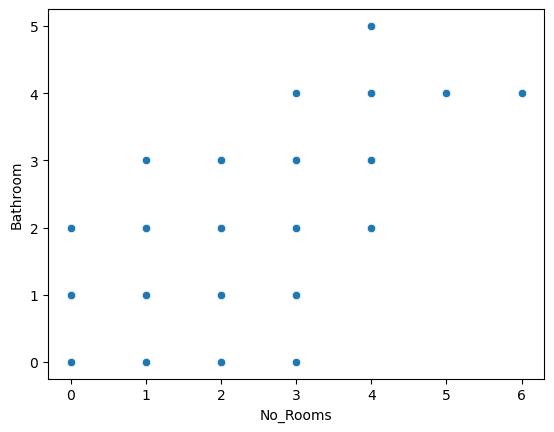

In [ ]:
#Menampilkan scatter plot antara No_Rooms dan Bathroom
sns.scatterplot(data = apartment, x = 'No_Rooms', y = 'Bathroom')

### Dari hasil diatas, dapat diketahui:

A. Nilai Korelasi Pearson

Nilai korelasi Pearson menunjukkan nilai sebesar 0.52468538, artinya jika berdasarkan data apartment yang ada, maka hubungan antara Area dan CleanedPrice dianggap ada atau cukup kuat. Karena nilai absolut dari nilai korelasi Pearson yang diperoleh cukup besar > 0,5

B. Scatter Plot No_Rooms vs Bathroom
1. Scatter Plot memiliki sumbu X berupa No_Rooms Area memiliki rentang dari 0 sampai 6 kamar
2. Scatter Plot memiliki sumbu y berupa Bathroom memiliki rentang dari 0 sampai 5 buah

### Keanehan data yang dapat disimpulkan:
1. Pada data No_Rooms diketahui memiliki nilai min. 0 kamar dan nilai maks 6 kamar, tetapi memiliki nilai tengah 2 kamar dan nilai rata-rata 1,5 kamar yang berbeda sedikit signifikan dari rata-rata antara nilai maks.-min. tsb
2. Pada data CleanedPrice diketahui memiliki rata-rata 256 juta rupiah per tahun, tetapi memiliki nilai tengah yang berbeda signifikan pada 65 juta rupiah per tahun
3. Pada data CleanedPrice diketahui memiliki nilai min. 12 juta rupiah per tahun dan nilai maks. 810 miliar rupiah per tahun, tetapi memiliki nilai tengah pada 65 juta rupiah per tahun dan nilai rata-rata 256 juta per tahun yang berbeda signifikan dari rata-rata antara nilai maks.-min. tsb
4. Nilai korelasi Pearson antara No_Rooms dan CleanedPrice menunjukan hubungan antara jumlah kamar dan harga apartemen tidak ada. Padahal jumlah kamar dan harga apartemen memiliki hubungan yang kuat adalah pengetahuan umum/fakta
5. Pada Scatter Plot antara No_Rooms dan CleanedPrice menunjukkan adanya data yang dapat dicurigai sebagai outlier pada pojok kiri atas, karena memiliki nilai No_Rooms yang kecil, tetapi nilai CleanedPrice yang tinggi

### Keanehan data yang dapat disimpulkan:
1. Pada data No_Rooms diketahui memiliki nilai min. 0 kamar dan nilai maks 6 kamar, tetapi memiliki nilai tengah 2 kamar dan nilai rata-rata 1,5 kamar yang berbeda sedikit signifikan dari rata-rata antara nilai maks.-min. tsb
2. Pada data Bathroom diketahui memiliki nilai min. 0 buah. Padahal suatu unit apartemen harusnya memiliki minimal 1 buah kamar mandi
3. Pada data No_Rooms diketahui memiliki nilai min. 0 kamar dan nilai maks 5 kamar, tetapi memiliki nilai tengah 1 kamar dan nilai rata-rata 1,25 kamar yang berbeda sedikit signifikan dari rata-rata antara nilai maks.-min. tsb

### Saya menyimpulkan No_Rooms dan Bathroom: Ada hubungan